# Agglomerative Clustering

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

## Point

In [3]:
def flatten(lst):
    """
    Returns a flattened version of the input list.
    """
    if not isinstance(lst, list):
        return [lst]
    
    flattened_lst = []
    for item in lst:
        if isinstance(item, list):
            flattened_lst.extend(flatten(item))
        else:
            flattened_lst.append(item)
    return flattened_lst

In [4]:
class Point:
    """ Class for a Point """
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def to_array(self):
        """ returns an array of the coordinates """
        return np.array([self.x, self.y])
    
    def dist(self, other):
        return np.linalg.norm(self.to_array() - other.to_array())
        
    def __eq__(self, other):
        """ Compares two points if they are equal """
        return np.allclose(self.to_array(), other.to_array())
    
    def __repr__(self):
        """ returns the string of the coordinates"""
        return f"Point({self.x}, {self.y})"

## Cluster

In [34]:
class Cluster:
    def __init__(self, points: list[Point,...]):
        self.points: list[Point,...] = points
        
    def add_point(self, point: Point):
        if point not in self.points:
            self.points.append(point)
    
    def add_points(self, points: list[Point, ...]):
        for point in points:
            self.add_point(point)
        
            
    def linkage(self, other, link_type: str = "average"):
        """
        linkage types are:
        "average", "single", "complete"
        """
        
        a_arr = np.array([i.to_array() for i in self.points])
        b_arr = np.array([i.to_array() for i in other.points])

        distances = np.linalg.norm(a_arr[:, np.newaxis] - b_arr, axis=2)
        
        if link_type == "single":
            result = np.min(distances)
        elif link_type == "complete":
            result = np.max(distances)
        elif link_type == "average":
            result = np.mean(distances)
            
        return result
    
    
    def __repr__(self):
        return f"Cluster: {self.points}"

In [54]:
def fit(data, link_type: str):
    # make all the points in data as Points
    data_point: list[Point, ...] = [Point(i[0], i[1]) for i in data]

    # make every point as a cluster
    clusters = [Cluster([i]) for i in data_point]
    all_clusters = list(range(len(clusters)))
    a_c = []

    for _ in tqdm(range(len(clusters) - 1)):
        l = len(clusters)
        min_ = np.inf
        pairs = np.zeros(2, dtype=int)

        # find the minimum value's indexes
        for i in range(l):
            for j in range(i + 1 , l):
                d = clusters[i].linkage(clusters[j], link_type)
                if d < min_:
                    min_ = d
                    pairs[0], pairs[1] = i, j


        i, j = pairs

        # merge the pairs
        clusters[i].add_points(clusters[j].points)
        all_clusters[i] = [all_clusters[i], all_clusters[j]]


        # delete the next
        clusters.pop(j)
        all_clusters.pop(j)

        a_c.append(all_clusters[:])
        
    return a_c

In [59]:
def create_new_labels(data, k:int):
    # getting the solution
    l = len(data)
    new_label = [0] * l
    
    for i in tqdm(range(l)):
        for j in range(k):
            if i in flatten(result[-k][j]):
                new_label[i] = j

    new_label = np.array(new_label)
    return new_label


def plot_clusters(labels, new_labels):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.scatter(data[:, 0], data[:, 1], c=labels)
    plt.title(f"Actual")

    plt.subplot(1, 2, 2)
    plt.scatter(data[:, 0], data[:, 1], c=new_labels)
    plt.title(f"Agglomerative Clustering using $k={k}$")

    plt.show()

## Data

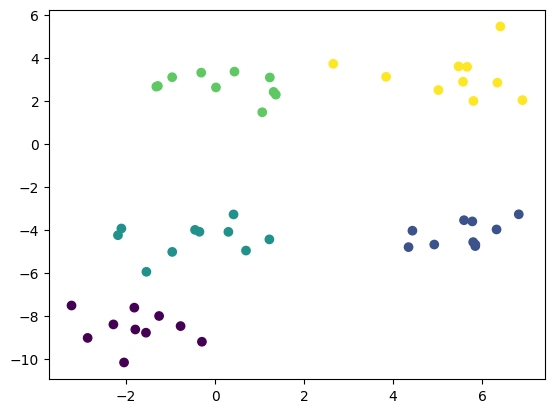

In [55]:
data, labels = make_blobs(n_samples=50, n_features=2, centers=5, random_state=40)

plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.show()

---
## 1. Average Linkage

In [58]:
result = fit(data, "average")

100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [00:05<00:00,  9.68it/s]


In [60]:
# number of clusters required
k = 3

new_labels = create_new_labels(data, k)
new_labels

100%|██████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<?, ?it/s]


array([0, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 2, 1, 0, 1, 2,
       2, 0, 0, 2, 1, 2])

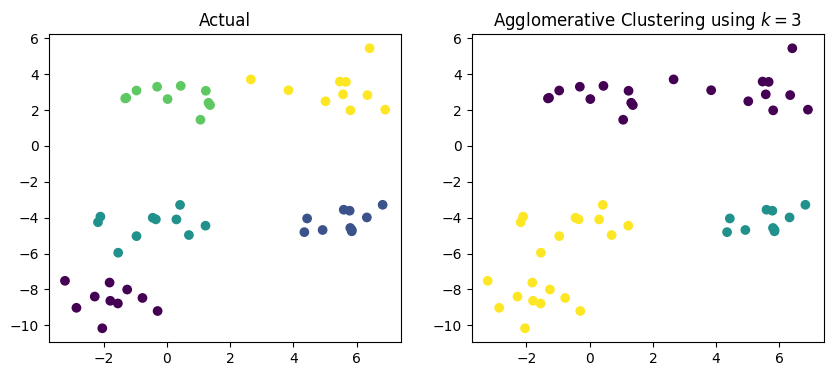

In [61]:
plot_clusters(labels, new_labels)

In [14]:
from sklearn.metrics.cluster import rand_score

In [62]:
rand_score(labels, new_label)

0.8367346938775511

---
## 2. Single Linkage

100%|████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 6245.80it/s]


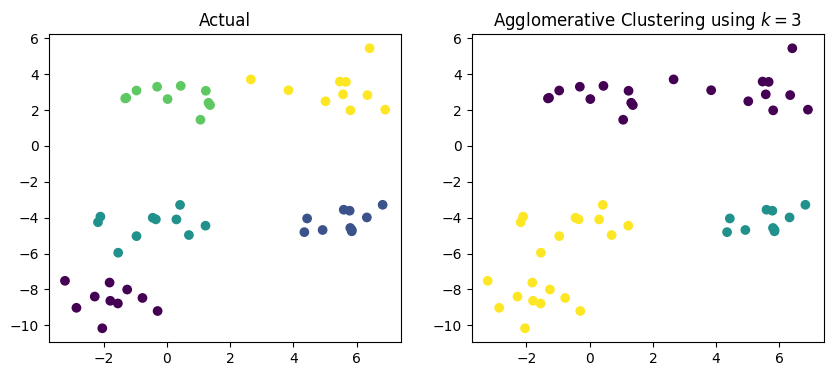

In [63]:
result = fit(data, "single")

k = 3
new_labels = create_new_labels(data, k)
plot_clusters(labels, new_labels)

---
## 3. Complete Linkage

100%|████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 6232.25it/s]


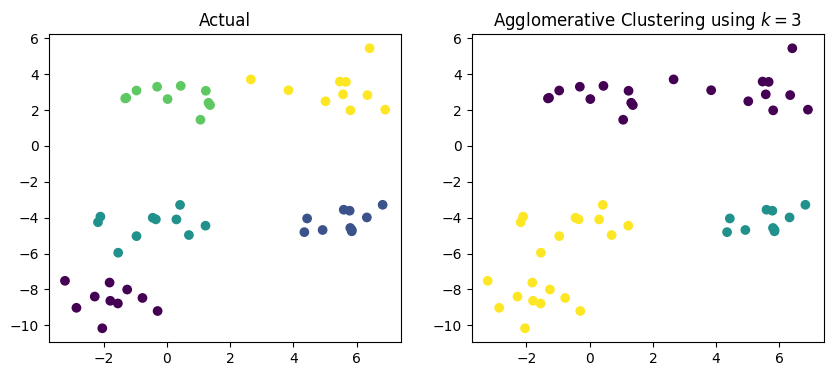

In [64]:
result = fit(data, "complete")

k = 3
new_labels = create_new_labels(data, k)
plot_clusters(labels, new_labels)

---
## Using another dataset

In [65]:
df = pd.read_csv("DBSCAN/export.csv", header=None)
df.head()

,0,1
0,130.959877,170.064639
1,147.954671,170.064639
2,170.947626,171.065019
3,121.962634,192.073004
4,122.962328,211.080228


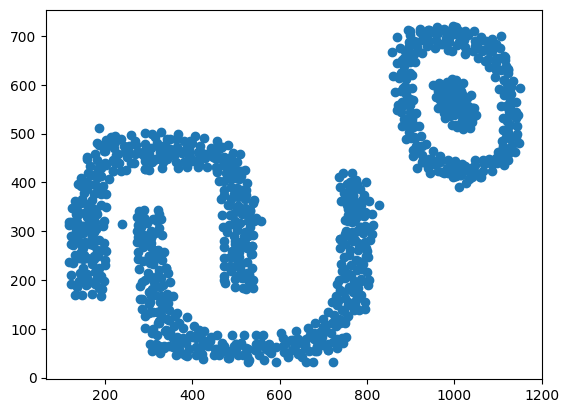

In [66]:
data = df.values

plt.scatter(data[:, 0], data[:, 1])
plt.show()